# Influence of salt intake behavior to blood pressure
## STATS 506 group project
### Author: Xinjun Li

This is a report generated by jupyter notebook for the group project of STATS 506 in University of Michigan.

Our project aims to answer the following question:

>**Is salt intake associated with blood pressure?**
**If so, to what extent is that relationship mediated or moderated by age or waist size?**

We will use [NHANES](https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx) data in analysis.

Required software and packages to run the code:
* Python3 
* os
* pandas
* statsmodels
* matplotlab

In [1]:
# Import packages
import os
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from matplotlib import pyplot as plt

In [2]:
# Set working directory
os.chdir('D:/学习/密歇根/STAT506/Group project/stats506/')

# read data
demo = pd.read_excel("RawData/Demographics_15_16.xlsx")
BMI = pd.read_excel("RawData/Body_measures_2015_16.xlsx")
bp = pd.read_excel('RawData/Blood_Pressure_2015_16.xlsx')
nutr = pd.read_excel("RawData/Dietary_nutrients_firstday_2015_16.xlsx")

We need first clean the row data and join different dataset.

In [3]:
# select useful columns
# ! Note: we need to drop values '9' or '99' which represent "don't know"
demo=demo.set_index('SEQN'
                    ).filter(items=['RIDAGEYR']  # 'RIAGENDR','RIDRETH3'
                    ).dropna()
# demo[['RIAGENDR','RIDRETH3']]=demo[['RIAGENDR','RIDRETH3']].astype('category')
BMI=BMI.set_index('SEQN'
                  ).filter(items=['BMXWAIST']   # ,'BMXWT','BMXHT'
                  ).dropna()
nutr=nutr.set_index('SEQN'
                    ).filter(items=['DBD100']  #,'DBQ095Z','DRQSPREP'
                    ).dropna(
                    ).query('DBD100 != 9'
                    ).astype('category')

# Calculate mean of blood pressure
bp=bp.set_index('SEQN'
                ).filter(regex='(BPXSY*)|(BPXDI*)')
bp=bp.assign(SY=bp.filter(regex='BPXSY*').mean(axis=1, skipna = True),
             DI=bp.filter(regex='BPXDI*').mean(axis=1, skipna = True)
             ).filter(items=['SY','DI']).dropna()

# Merge all data set
df=bp.join(demo,how='inner').join(BMI,how='inner').join(nutr,how='inner')

Take a look at the data we are about to work on.

In [4]:
# Show data summary of numeric variables
print(df.describe())

                SY           DI     RIDAGEYR     BMXWAIST
count  4670.000000  4670.000000  4670.000000  4670.000000
mean    119.510921    66.050393    38.107281    93.630557
std      17.292694    13.378804    21.598139    19.019918
min      74.000000     0.000000     8.000000    46.300000
25%     107.333333    58.666667    18.000000    79.700000
50%     116.666667    66.666667    35.000000    93.000000
75%     128.000000    74.666667    56.000000   105.900000
max     206.666667   124.000000    80.000000   171.600000


In [5]:
# Show data summary of categorical variables
print(df.describe(include='category'))

        DBD100
count   4670.0
unique     3.0
top        1.0
freq    2444.0


Generate plots show the relationship between salt intake behaviors and blood presure.

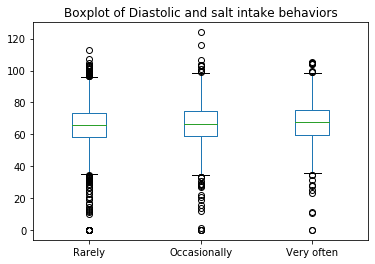

In [17]:
# plot Diastolic and salt intakes
DI_salt=df[['DBD100','DI']
            ].pivot(columns='DBD100', values='DI'
            )
DI_salt.columns=["Rarely","Occasionally","Very often"]
DI_salt.boxplot(grid=False)
plt.title("Boxplot of Diastolic and salt intake behaviors")
plt.suptitle("")
plt.show()

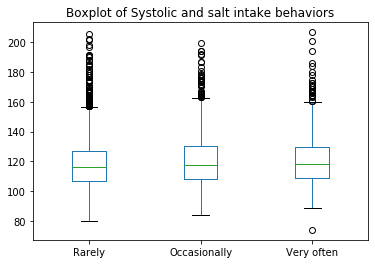

In [16]:
# plot Systolic and salt intakes
SY_salt=df[['DBD100','SY']
            ].pivot(columns='DBD100', values='SY'
            )
SY_salt.columns=["Rarely","Occasionally","Very often"]
SY_salt.boxplot(grid=False)
plt.title("Boxplot of Systolic and salt intake behaviors")
plt.suptitle("")
plt.show()

Now fit the ordinary least square to the data.

In [14]:
# fit ols to Diastolic measurements
ols_DI=ols('DI~DBD100',data=df).fit()
# Print the summary
print(ols_DI.summary())
print(anova_lm(ols_DI))

                            OLS Regression Results                            
Dep. Variable:                     DI   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     7.993
Date:                Wed, 04 Dec 2019   Prob (F-statistic):           0.000343
Time:                        23:45:26   Log-Likelihood:                -18730.
No. Observations:                4670   AIC:                         3.747e+04
Df Residuals:                    4667   BIC:                         3.749e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        65.4003      0.270    242.026

In [15]:
# fit ols to Systolic measurements
ols_SY=ols('SY~DBD100',data=df).fit()
# Print the summary
print(ols_SY.summary())
print(anova_lm(ols_SY))

                            OLS Regression Results                            
Dep. Variable:                     SY   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     8.841
Date:                Wed, 04 Dec 2019   Prob (F-statistic):           0.000147
Time:                        23:46:19   Log-Likelihood:                -19928.
No. Observations:                4670   AIC:                         3.986e+04
Df Residuals:                    4667   BIC:                         3.988e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       118.5461      0.349    339.471

From the above results, we know that both models are significant and every coefficients are significant(at the level of 95%).